In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np
import glob as gb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = os.path.join('G:/neuro/', 'lab3')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
pred_dir = os.path.join(base_dir, 'pred')

train_buffalo_dir = os.path.join(train_dir, 'buffalo')
train_elephant_dir = os.path.join(train_dir, 'elephant')
train_rhino_dir = os.path.join(train_dir, 'rhino')
train_zebra_dir = os.path.join(train_dir, 'zebra')

validation_buffalo_dir = os.path.join(validation_dir, 'buffalo')
validation_elephant_dir = os.path.join(validation_dir, 'elephant')
validation_rhino_dir = os.path.join(validation_dir, 'rhino')
validation_zebra_dir = os.path.join(validation_dir, 'zebra')


In [3]:
class_names = ['buffalo', 'elephant', 'rhino', 'zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [4]:
BATCH_SIZE = 100 # количество тренировочных изображений для обработки перед обновлением параметров модели
IMG_SHAPE = 150

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='categorical')


Found 1327 images belonging to 4 classes.
Found 152 images belonging to 4 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model = Sequential()
model.add(Conv2D(64,3,padding='same', input_shape=(100,100,3)))
model.add(MaxPool2D((4,4)))
model.add(Conv2D(32,3,padding='same', input_shape=(100,100,3)))
model.add(MaxPool2D((4,4)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Dropout(0.5))
model.add(Dense(4))

model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
EPOCHS = 25
total_train = 1327
total_val = 152
      
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
14/14 [==============================] - 29s 2s/step - loss: 1.2758 - accuracy: 0.3647 - val_loss: 0.9904 - val_accuracy: 0.5461
Epoch 2/25
14/14 [==============================] - 28s 2s/step - loss: 1.0133 - accuracy: 0.5576 - val_loss: 0.9136 - val_accuracy: 0.5987
Epoch 3/25
14/14 [==============================] - 29s 2s/step - loss: 0.8545 - accuracy: 0.6420 - val_loss: 0.7819 - val_accuracy: 0.6447
Epoch 4/25
14/14 [==============================] - 29s 2s/step - loss: 0.8003 - accuracy: 0.6436 - val_loss: 0.7895 - val_accuracy: 0.6645
Epoch 5/25
14/14 [==============================] - 28s 2s/step - loss: 0.6943 - accuracy: 0.7091 - val_loss: 0.8215 - val_accuracy: 0.6711
Epoch 6/25
14/14 [==============================] - 31s 2s/step - loss: 0.6416 - accuracy: 0.7423 - val_loss: 0.7416 - val_accuracy: 0.7171
Epoch 7/25
14/14 [==============================] - 28s 2s/step - loss: 0.5927 - acc

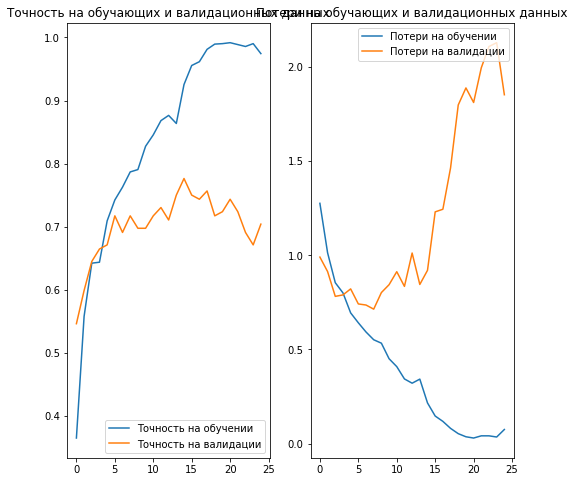

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

In [12]:
X_pred = []
files = gb.glob(pathname= str(pred_dir + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (IMG_SHAPE,IMG_SHAPE))
    X_pred.append(list(image_array))  

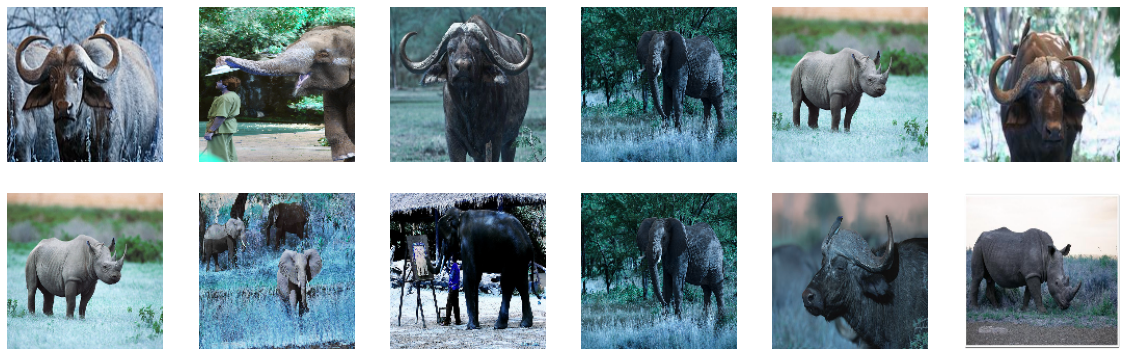

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [14]:
X_pred_array = np.array(X_pred)
y_pred = model.predict(X_pred_array)

In [15]:
classes = {'buffalo':0 ,'elephant':1,'rhino':2,'zebra':3}

def getclass(n) : 
    for x , y in classes.items() : 
        if n == y : 
            return x    

In [1]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),18))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getclass(np.argmax(y_pred[i])))

NameError: name 'plt' is not defined